In [ ]:
'''
source: https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74
source: Einwohner: https://de.wikipedia.org/wiki/Wetteraukreis
'''

In [429]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

%matplotlib inline

In [ ]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [248]:
#url="https://www.arcgis.com/sharing/rest/content/items/f10774f1c63e40168479a1feb6c7ca74/data"
#s=requests.get(url).content
#rki=pd.read_csv(s)

In [164]:
#rki = pd.read_csv('RKI_COVID19.csv')

In [450]:
rki = pd.read_csv('https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv')

In [451]:
rki.tail()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
767273,16,Thüringen,LK Greiz,A35-A59,W,2,0,767274,2020/11/07 00:00:00+00,16076,"19.12.2020, 00:00 Uhr",0,-9,2020/11/07 00:00:00+00,0,2,0,Nicht übermittelt
767274,16,Thüringen,LK Greiz,A35-A59,W,1,0,767275,2020/11/08 00:00:00+00,16076,"19.12.2020, 00:00 Uhr",0,-9,2020/11/01 00:00:00+00,0,1,1,Nicht übermittelt
767275,16,Thüringen,LK Greiz,A35-A59,W,1,0,767276,2020/11/09 00:00:00+00,16076,"19.12.2020, 00:00 Uhr",0,-9,2020/11/07 00:00:00+00,0,1,1,Nicht übermittelt
767276,16,Thüringen,LK Greiz,A35-A59,W,1,0,767277,2020/11/10 00:00:00+00,16076,"19.12.2020, 00:00 Uhr",0,-9,2020/11/06 00:00:00+00,0,1,1,Nicht übermittelt
767277,16,Thüringen,LK Greiz,A35-A59,W,1,0,767278,2020/11/10 00:00:00+00,16076,"19.12.2020, 00:00 Uhr",0,-9,2020/11/07 00:00:00+00,0,1,1,Nicht übermittelt


In [354]:
rki[rki.Landkreis.str.contains('Wetterau')]

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
290000,6,Hessen,LK Wetteraukreis,A05-A14,M,1,0,290001,2020/12/04 00:00:00+00,6440,"19.12.2020, 00:00 Uhr",0,-9,2020/12/03 00:00:00+00,0,1,1,Nicht übermittelt
290001,6,Hessen,LK Wetteraukreis,A05-A14,M,1,0,290002,2020/12/04 00:00:00+00,6440,"19.12.2020, 00:00 Uhr",0,-9,2020/12/04 00:00:00+00,-9,0,0,Nicht übermittelt
290002,6,Hessen,LK Wetteraukreis,A05-A14,M,1,0,290003,2020/12/04 00:00:00+00,6440,"19.12.2020, 00:00 Uhr",0,-9,2020/12/04 00:00:00+00,0,1,0,Nicht übermittelt
290003,6,Hessen,LK Wetteraukreis,A05-A14,M,1,0,290004,2020/12/05 00:00:00+00,6440,"19.12.2020, 00:00 Uhr",0,-9,2020/12/05 00:00:00+00,1,1,0,Nicht übermittelt
290004,6,Hessen,LK Wetteraukreis,A05-A14,M,1,0,290005,2020/12/07 00:00:00+00,6440,"19.12.2020, 00:00 Uhr",0,-9,2020/12/02 00:00:00+00,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294995,6,Hessen,LK Wetteraukreis,A15-A34,W,-1,0,294996,2020/12/12 00:00:00+00,6440,"19.12.2020, 00:00 Uhr",-1,-9,2020/12/12 00:00:00+00,-9,0,0,Nicht übermittelt
294996,6,Hessen,LK Wetteraukreis,A15-A34,W,3,0,294997,2020/12/12 00:00:00+00,6440,"19.12.2020, 00:00 Uhr",0,-9,2020/12/12 00:00:00+00,-9,0,0,Nicht übermittelt
294997,6,Hessen,LK Wetteraukreis,A15-A34,W,1,0,294998,2020/12/13 00:00:00+00,6440,"19.12.2020, 00:00 Uhr",0,-9,2020/12/08 00:00:00+00,-9,0,1,Nicht übermittelt
294998,6,Hessen,LK Wetteraukreis,A15-A34,W,1,0,294999,2020/12/13 00:00:00+00,6440,"19.12.2020, 00:00 Uhr",0,-9,2020/12/11 00:00:00+00,-9,0,1,Nicht übermittelt


In [355]:
rki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767278 entries, 0 to 767277
Data columns (total 18 columns):
IdBundesland            767278 non-null int64
Bundesland              767278 non-null object
Landkreis               767278 non-null object
Altersgruppe            767278 non-null object
Geschlecht              767278 non-null object
AnzahlFall              767278 non-null int64
AnzahlTodesfall         767278 non-null int64
ObjectId                767278 non-null int64
Meldedatum              767278 non-null object
IdLandkreis             767278 non-null int64
Datenstand              767278 non-null object
NeuerFall               767278 non-null int64
NeuerTodesfall          767278 non-null int64
Refdatum                767278 non-null object
NeuGenesen              767278 non-null int64
AnzahlGenesen           767278 non-null int64
IstErkrankungsbeginn    767278 non-null int64
Altersgruppe2           767278 non-null object
dtypes: int64(10), object(8)
memory usage: 105.4+ MB


In [456]:
wtk = pd.DataFrame(rki[['Meldedatum','Bundesland','Landkreis','AnzahlFall','NeuerFall']])[rki['Landkreis']=='LK Wetteraukreis']

In [457]:
wtk = pd.DataFrame(rki[['Meldedatum','Bundesland','Landkreis','AnzahlFall','NeuerFall']])[rki['NeuerFall'].isin([0,1])][rki['Landkreis']=='LK Wetteraukreis']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [473]:
wtk

,Meldedatum,Bundesland,Landkreis,AnzahlFall,NeuerFall
290000,2020-12-04,Hessen,LK Wetteraukreis,1,0
290001,2020-12-04,Hessen,LK Wetteraukreis,1,0
290002,2020-12-04,Hessen,LK Wetteraukreis,1,0
290003,2020-12-05,Hessen,LK Wetteraukreis,1,0
290004,2020-12-07,Hessen,LK Wetteraukreis,1,0
...,...,...,...,...,...
294994,2020-12-12,Hessen,LK Wetteraukreis,1,0
294996,2020-12-12,Hessen,LK Wetteraukreis,3,0
294997,2020-12-13,Hessen,LK Wetteraukreis,1,0
294998,2020-12-13,Hessen,LK Wetteraukreis,1,0


In [468]:
wtk['Meldedatum'] = wtk['Meldedatum'].astype('datetime64[ns]')

In [471]:
wtk['Meldedatum'] = wtk['Meldedatum'].dt.date

In [474]:
wtk.set_index('Meldedatum')

,Bundesland,Landkreis,AnzahlFall,NeuerFall
Meldedatum,,,,
2020-12-04,Hessen,LK Wetteraukreis,1,0
2020-12-04,Hessen,LK Wetteraukreis,1,0
2020-12-04,Hessen,LK Wetteraukreis,1,0
2020-12-05,Hessen,LK Wetteraukreis,1,0
2020-12-07,Hessen,LK Wetteraukreis,1,0
...,...,...,...,...
2020-12-12,Hessen,LK Wetteraukreis,1,0
2020-12-12,Hessen,LK Wetteraukreis,3,0
2020-12-13,Hessen,LK Wetteraukreis,1,0


In [475]:
wtk_groupby = wtk.groupby(['Meldedatum','Bundesland','Landkreis']).AnzahlFall.sum()

In [476]:
wtk_groupby = wtk.groupby(['Meldedatum']).AnzahlFall.sum()

In [477]:
wtk_groupby = pd.DataFrame(wtk_groupby)

In [478]:
wtk_groupby['rolling_sum'] = wtk_groupby['AnzahlFall'].rolling(7).sum()

In [479]:
wtk_groupby['inzidenzPro100000'] = wtk_groupby['rolling_sum'] / 308339 * 100000

In [480]:
wtk_groupby

,AnzahlFall,rolling_sum,inzidenzPro100000
Meldedatum,,,
2020-03-11,1,NaN,NaN
2020-03-12,1,NaN,NaN
2020-03-13,2,NaN,NaN
2020-03-14,6,NaN,NaN
2020-03-15,3,NaN,NaN
...,...,...,...
2020-12-14,86,803.0,260.427646
2020-12-15,94,761.0,246.806275
2020-12-16,104,772.0,250.373777


In [447]:
wtk_groupby.to_csv('export_corona.csv')

In [481]:
wtk_groupby['inzidenzPro100000']

Meldedatum
2020-03-11           NaN
2020-03-12           NaN
2020-03-13           NaN
2020-03-14           NaN
2020-03-15           NaN
                 ...    
2020-12-14    260.427646
2020-12-15    246.806275
2020-12-16    250.373777
2020-12-17    250.698095
2020-12-18    227.995810
Name: inzidenzPro100000, Length: 236, dtype: float64

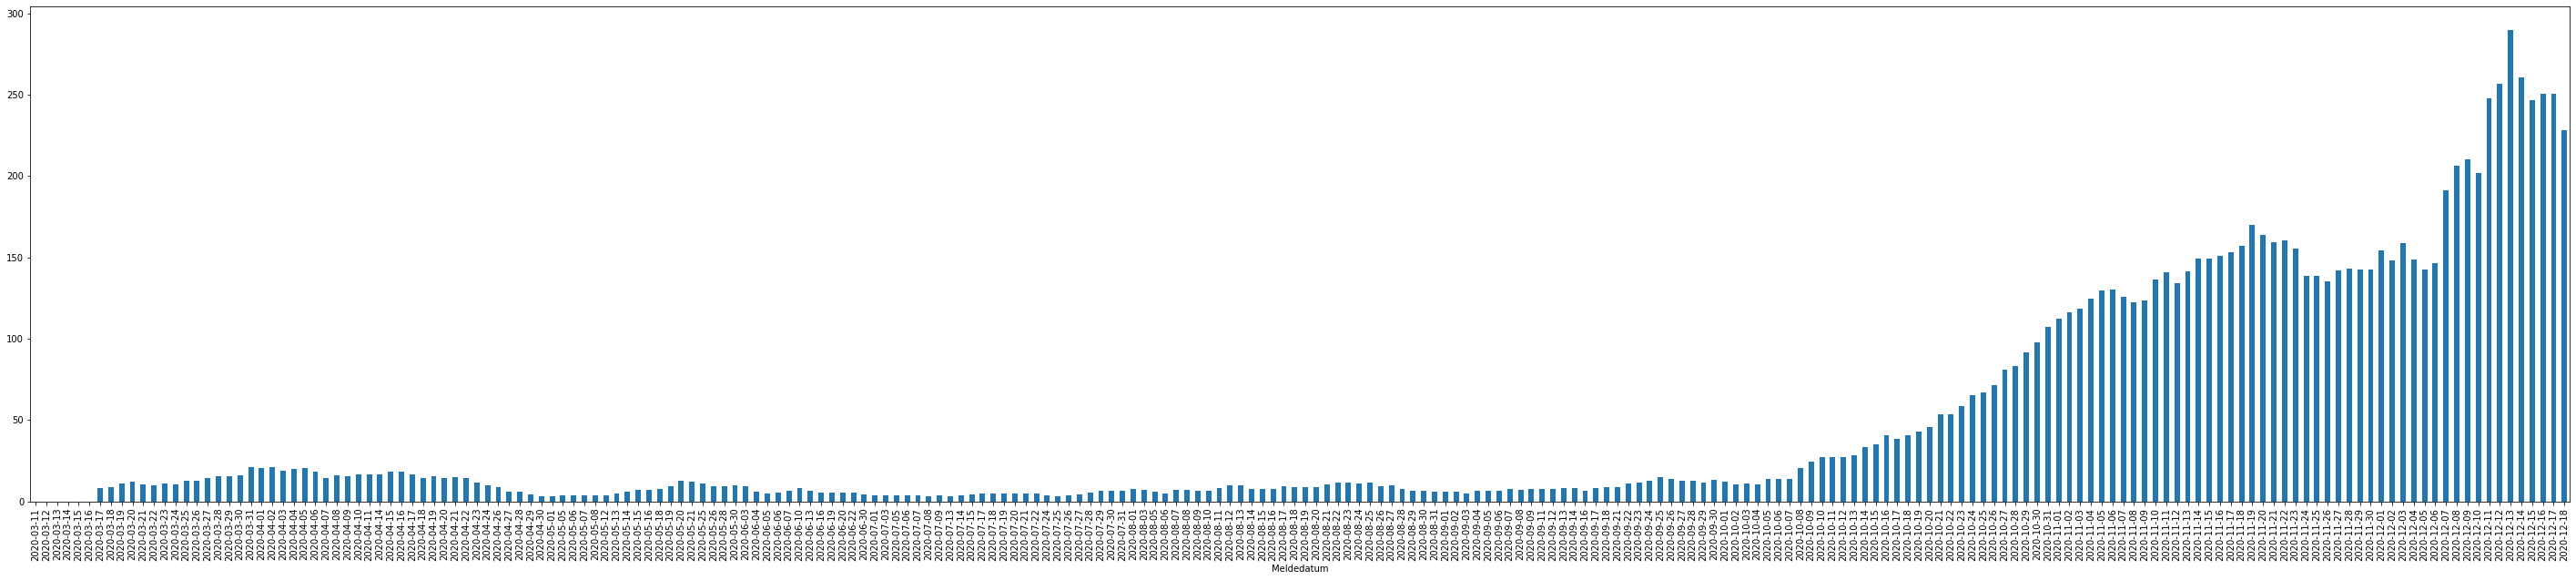

In [482]:
thePlotGADaten = wtk_groupby['inzidenzPro100000'].plot(kind="bar",figsize=(50,10))
#for x,y in zip('inzidenzPro100000','inzidenzPro100000'):

    #label = "{:.2f}".format(y)
#    label = y

#    plt.annotate(label, # this is the text
#                 (x,y), # this is the point to label
#                 textcoords="offset points", # how to position the text
#                 xytext=(0,10), # distance from text to points (x,y)
#                 ha='center') # horizontal alignment can be left, right or center
#
#plt.show()

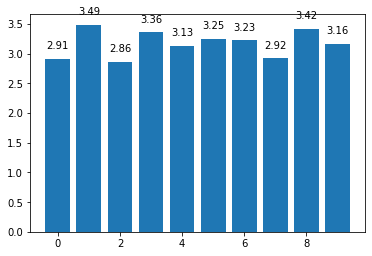

In [398]:
plt.clf()

# using some dummy data for this example
xs = np.arange(0,10,1)
ys = np.random.normal(loc=3, scale=0.4, size=10)

plt.bar(xs,ys)

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()